In [1]:
import numpy as np

In [2]:
import pandas as pd

In [5]:
pop = pd.read_csv('./state-population.csv')
areas=pd.read_csv('./state-areas.csv')
abbrevs=pd.read_csv('./state-abbrevs.csv')

In [6]:
pop.head()

,state/region,ages,year,population
0,AL,under18,2012,1117489.0
1,AL,total,2012,4817528.0
2,AL,under18,2010,1130966.0
3,AL,total,2010,4785570.0
4,AL,under18,2011,1125763.0


In [8]:
areas.head()

,state,area (sq. mi)
0,Alabama,52423
1,Alaska,656425
2,Arizona,114006
3,Arkansas,53182
4,California,163707


In [9]:
abbrevs.head()

,state,abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [18]:
#column명이 다르지만, 같은값을 가지고 있기 때문에 왼쪽 pop에서는 state/region기준, 오른쪽인 abbrevs에서는 abbreviation기준으로 정렬한다는뜻
merged=pd.merge(pop, abbrevs, how='outer', left_on='state/region', right_on='abbreviation')
merged=merged.drop('abbreviation', axis=1)
merged.head()

,state/region,ages,year,population,state
0,AK,total,1990,553290.0,Alaska
1,AK,under18,1990,177502.0,Alaska
2,AK,total,1992,588736.0,Alaska
3,AK,under18,1991,182180.0,Alaska
4,AK,under18,1992,184878.0,Alaska


In [13]:
# 두 데이터프레임 모두가 가지고 있는 state를 기준으로 병합,동일한 열.
#how=left는 왼쪽프레임 기준으로 병합. 왼쪽은 데이터프레임 다 가져오지만 오른쪽은 일치하는것만 가져온다고. 
# on = 이하는 이 column기준으로 join하라.

final=pd.merge(merged, areas, on='state', how='left')
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AK,total,1990,553290.0,Alaska,656425.0
1,AK,under18,1990,177502.0,Alaska,656425.0
2,AK,total,1992,588736.0,Alaska,656425.0
3,AK,under18,1991,182180.0,Alaska,656425.0
4,AK,under18,1992,184878.0,Alaska,656425.0


In [15]:
final.isnull().any()

state/region     False
ages             False
year             False
population        True
state             True
area (sq. mi)     True
dtype: bool

In [16]:
#unique()중복제거.
final['state'][final['area (sq. mi)'].isnull()].unique()

array([nan], dtype=object)

In [19]:
#shape를 보고서, 큰거를 왼쪽에 놓고 하는게 편하니까. 
pop.shape, areas.shape, abbrevs.shape

((2544, 4), (52, 2), (51, 2))

In [20]:
import seaborn as sns

In [21]:
plantes=sns.load_dataset('planets')
plantes.shape

(1035, 6)

In [22]:
plantes.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [23]:
rng=np.random.RandomState(42)
df=pd.DataFrame({'A':rng.rand(5), 'B':rng.rand(5)})
df

,A,B
0,0.374540,0.155995
1,0.950714,0.058084
2,0.731994,0.866176
3,0.598658,0.601115
4,0.156019,0.708073


In [24]:
df.mean()

A    0.562385
B    0.477888
dtype: float64

In [25]:
df.mean(axis='columns')

0    0.265267
1    0.504399
2    0.799085
3    0.599887
4    0.432046
dtype: float64

In [26]:
#dropna로 결측치 포함된 행 날려주고, 여러가지값 측정한거 뱉어다오.
plantes.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


In [27]:
df=pd.DataFrame({'key':['A','B','C','A','B','C'],
                 'data': range(6)}, columns=['key','data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [30]:
df.groupby('key')

In [31]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


In [32]:
#method 열을 기준으로 묶은 후, 그 폴더들에서 orbital_period 열의 중앙값을 뱉어라.
plantes.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [33]:
plantes.groupby('method')['year'].describe().unstack()

       method                       
count  Astrometry                          2.0
       Eclipse Timing Variations           9.0
       Imaging                            38.0
       Microlensing                       23.0
       Orbital Brightness Modulation       3.0
                                         ...  
max    Pulsar Timing                    2011.0
       Pulsation Timing Variations      2007.0
       Radial Velocity                  2014.0
       Transit                          2014.0
       Transit Timing Variations        2014.0
Length: 80, dtype: float64

In [34]:
rng=np.random.RandomState(0)
df=pd.DataFrame({'key':['A','B','C','A','B','C'],'data1':range(6), 'data2':rng.randint(0,10,6)},
                columns=['key','data1','data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [35]:
df.groupby('key').aggregate(['min',np.median, max])

C:\Users\user\AppData\Local\Temp\ipykernel_5748\353838618.py:1: FutureWarning: The provided callable <function median at 0x0000022F7FE29A60> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.groupby('key').aggregate(['min',np.median, max])
C:\Users\user\AppData\Local\Temp\ipykernel_5748\353838618.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df.groupby('key').aggregate(['min',np.median, max])


data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

In [36]:
#aggregate- column별로 각각 다른 함수를 적용할수있어서 유연하다!! 
df.groupby('key').aggregate({'data1':'min','data2':'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


In [37]:
#std-standard deviation.표준편차계산해줌 
def filter_func(x):
     return x['data2'].std() > 4
print(df); print(df.groupby('key').std());

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
       data1     data2
key                   
A    2.12132  1.414214
B    2.12132  4.949747
C    2.12132  4.242641


In [38]:
def norm_by_data2(x):
     #x는 그룹 값을 가지는 dataFrame
     x['data1'] /= x['data2'].sum()
     #data1열을 data2열의 합으로 나누어 그 값을 data1에 할당함.
     return x

In [39]:
#apply()는 첫 번째 열을 두번째 열의 합계로 규정함
print(df.groupby('key').apply(norm_by_data2))

      key     data1  data2
key                       
A   0   A  0.000000      5
    3   A  0.375000      3
B   1   B  0.142857      0
    4   B  0.571429      7
C   2   C  0.166667      3
    5   C  0.416667      9


C:\Users\user\AppData\Local\Temp\ipykernel_5748\707654350.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  print(df.groupby('key').apply(norm_by_data2))


In [43]:
plantes.groupby(['method'])['distance'].apply(lambda x: x.sum())

method
Astrometry                           35.75
Eclipse Timing Variations          1261.44
Imaging                            2166.91
Microlensing                      41440.00
Orbital Brightness Modulation      2360.00
Pulsar Timing                      1200.00
Pulsation Timing Variations           0.00
Radial Velocity                   27348.11
Transit                          134242.77
Transit Timing Variations          3313.00
Name: distance, dtype: float64

In [45]:
#year 열을 10개씩 나누고, 그 몫에 10을 곱해서 10년 단위의 값을 만들음. 1980-1990.이런식으로 10년씩 분리하기 위하여
#그렇게 만들어진 decade열의 값을 문자열로 변환하고, 각 값에 s를 붙여서 1990s 처럼 보이게 함
decade = 10 * (plantes['year'] // 10)
decade = decade.astype(str)+'s'
decade.name = 'decade'
plantes.groupby(['method',decade])['number'].sum().unstack().fillna(0)
#unstack메서드를 통하여 decade레벨을 열 자리로 옮길 수 있게 됨.

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


In [46]:
import seaborn as sns

In [47]:
titanic=sns.load_dataset('titanic')

In [48]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [49]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [50]:
#unstack 하기 전에는 female이 첫번째 라벨, class가 두번째 라벨.
titanic.groupby(['sex','class'])['survived'].aggregate('mean').unstack()

C:\Users\user\AppData\Local\Temp\ipykernel_5748\602533180.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic.groupby(['sex','class'])['survived'].aggregate('mean').unstack()


class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [51]:
#pivot_tabe-dataFrame을 재구성 및 요약할 수 있음
#피벗테이블 만들건데, 값으로 사용할 열은 survived야 
#인덱스로 사용할 열은 sex고, columns은 class로 잡겠어. class가 여러개 있으면 그거에 따라 다른값이 나와도 ㅇㅋ
titanic.pivot_table('survived', index='sex', columns='class')

C:\Users\user\AppData\Local\Temp\ipykernel_5748\1756680182.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  titanic.pivot_table('survived', index='sex', columns='class')


class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [57]:
#cut을 사용하고 []구간을 정하면, 그걸로 age를 다시 나눈다는말이됨. 
age=pd.cut(titanic['age'], [0,18,80])
#피벗테이블('값', [인덱스로 사용할 열. 첫번재 sex, 두번째 age], column=class)
titanic.pivot_table('survived', ['sex',age],'class')

C:\Users\user\AppData\Local\Temp\ipykernel_5748\1478976657.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  titanic.pivot_table('survived', ['sex',age],'class')


class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [58]:
fare=pd.qcut(titanic['fare'],2)
titanic.pivot_table('survived',['sex',age],[fare,'class'])

C:\Users\user\AppData\Local\Temp\ipykernel_5748\2451712794.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  titanic.pivot_table('survived',['sex',age],[fare,'class'])


fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

In [61]:
titanic['fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

In [62]:
#fare 열의 값들을 4가지로 범주화 해서 나타내 주겠니:?
new_fare=pd.qcut(titanic['fare'],4)
#이건 구간에 따른 값을 보여주는거라서, 이러한 데이터 구간을 카테고리형으로 변환하는거임
new_fare

0       (-0.001, 7.91]
1      (31.0, 512.329]
2       (7.91, 14.454]
3      (31.0, 512.329]
4       (7.91, 14.454]
            ...       
886     (7.91, 14.454]
887     (14.454, 31.0]
888     (14.454, 31.0]
889     (14.454, 31.0]
890     (-0.001, 7.91]
Name: fare, Length: 891, dtype: category
Categories (4, interval[float64, right]): [(-0.001, 7.91] < (7.91, 14.454] < (14.454, 31.0] < (31.0, 512.329]]

In [63]:
#4개로 범주화 한것에다가 4321 이런 이름을 붙여서 표현해 주겠니? 
new_fare=new_fare.cat.rename_categories([4,3,2,1])
new_fare

0      4
1      1
2      3
3      1
4      3
      ..
886    3
887    2
888    2
889    2
890    4
Name: fare, Length: 891, dtype: category
Categories (4, int64): [4 < 3 < 2 < 1]

In [64]:
br=pd.read_csv('./births.csv')

In [65]:
br.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [66]:
#decade라는 새로운 열 만들어서 year를 10단위로 묶어내고.
br['decade']=10*(br['year']//10)
#각 셀의 값을 집계하는 방법 마지막에 적어줌-aggfunc='sum'
br.pivot_table('births',index='decade',columns='gender',aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


In [67]:
%matplotlib inline
import matplotlib.pyplot as plt

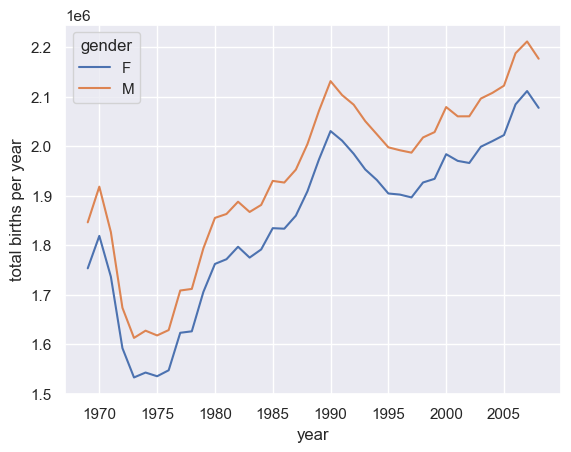

In [68]:
sns.set()
br.pivot_table('births',index='year',columns='gender',aggfunc='sum').plot()
plt.ylabel('total births per year');

In [69]:
qt=np.percentile(br['births'],[25,50,75])
mu=qt[1]
sig=0.74*(qt[2]-qt[0])

In [70]:
br=br.query('(births > @mu - 5*@sig) & (births < @mu + 5 * @sig)')

In [71]:
#null값 때문에 문자열이었던 day열을 정수형으로 변환
br['day']=br['day'].astype(int)

In [73]:
br.index=pd.to_datetime(10000*br.year +
                        100 * br.month+
                        br.day, format='%Y%m%d')
br['dayofweek']=br.index.dayofweek

In [74]:
import matplotlib as mpl

C:\Users\user\AppData\Local\Temp\ipykernel_5748\2727383288.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['M','T','W','T','F','Sa','Su'])


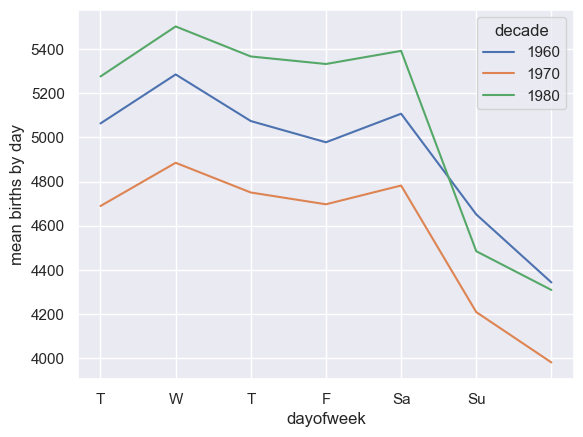

In [75]:
br.pivot_table('births',index='dayofweek', columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['M','T','W','T','F','Sa','Su'])
plt.ylabel('mean births by day');

시계열 다루기(date & time)

In [76]:
from datetime import datetime
datetime(year=2021, month=7, day=4)

datetime.datetime(2021, 7, 4, 0, 0)

In [79]:
from dateutil import parser
date=parser.parse("4th of July, 2021")
date

datetime.datetime(2021, 7, 4, 0, 0)

In [106]:
date.strftime('%A')

'Sunday'

In [81]:
date=np.array('2021-07-04', dtype=np.datetime64)
date

array('2021-07-04', dtype='datetime64[D]')

In [83]:
date + np.arange(12)

array(['2021-07-04', '2021-07-05', '2021-07-06', '2021-07-07',
       '2021-07-08', '2021-07-09', '2021-07-10', '2021-07-11',
       '2021-07-12', '2021-07-13', '2021-07-14', '2021-07-15'],
      dtype='datetime64[D]')

In [84]:
np.datetime64('2021-07-04')

numpy.datetime64('2021-07-04')

In [85]:
np.datetime64('2021-07-04 12:00')

numpy.datetime64('2021-07-04T12:00')

In [86]:
np.datetime64('2021-07-04 12:59:59.50', 'ns')

numpy.datetime64('2021-07-04T12:59:59.500000000')

In [87]:
date = pd.to_datetime("4th of July, 2021")
date

Timestamp('2021-07-04 00:00:00')

In [88]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2021-07-04', '2021-07-05', '2021-07-06', '2021-07-07',
               '2021-07-08', '2021-07-09', '2021-07-10', '2021-07-11',
               '2021-07-12', '2021-07-13', '2021-07-14', '2021-07-15'],
              dtype='datetime64[ns]', freq=None)

In [89]:
#인덱스 지정하면서, 인덱스 타입을 datetimeindex라고 명시해주는거임 
index=pd.DatetimeIndex(['2020-07-04','2020-08-04','2021-07-04','2021-08-04'])
data=pd.Series([0,1,2,3], index=index)
data

2020-07-04    0
2020-08-04    1
2021-07-04    2
2021-08-04    3
dtype: int64

In [90]:
#위에서 데이트타임인덱스로 지정했기때문에 이게가능한거임 그냥 연도만 전달해도 2021년거가 다나오지 
data['2021']

2021-07-04    2
2021-08-04    3
dtype: int64

In [91]:
#pd.to_datetime 얘는 다양한 형식을 분석할 수 있음. 다양한 형태로 날짜 전달해도 얘는 일련의 날짜들을 다
#timestamp 과정을 거쳐서 datetimeIndex로 생성해서 출력해줌.
dates=pd.to_datetime([datetime(2021, 7, 3), '4th of July, 2021', '2021-Jul-6','07-07-2021','20210708'])
dates

DatetimeIndex(['2021-07-03', '2021-07-04', '2021-07-06', '2021-07-07',
               '2021-07-08'],
              dtype='datetime64[ns]', freq=None)

In [92]:
# dtype='period[D]'
dates.to_period('D')

PeriodIndex(['2021-07-03', '2021-07-04', '2021-07-06', '2021-07-07',
             '2021-07-08'],
            dtype='period[D]')

In [93]:
#어떤 날짜에서 다른 날짜를 빼면 timedeltaIndex가 되쥬
#지속기간을 말하는 시간델타.
dates-dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

In [94]:
pd.date_range('2015-07-03','2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [95]:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [96]:
#freq='H' 주기를 h로 전달하면서 시간단위로 timestamp 형성하도록. 
pd.date_range('2015-07-03', periods=8, freq='H')

C:\Users\user\AppData\Local\Temp\ipykernel_5748\3521404607.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.date_range('2015-07-03', periods=8, freq='H')


DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='h')

In [97]:
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]')

In [98]:
pd.timedelta_range(0, periods=10, freq='H')

C:\Users\user\AppData\Local\Temp\ipykernel_5748\3928887474.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.timedelta_range(0, periods=10, freq='H')


TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00'],
               dtype='timedelta64[ns]', freq='h')

In [101]:
now =datetime.now()
now

datetime.datetime(2024, 7, 1, 16, 20, 39, 623681)

In [104]:
#이밑에 이거 자체는 String이기 때문에, time계열임을 명시해서 그걸로 바꿔주는거임
date_str='2024-07-01'
datetime.strptime(date_str, '%Y-%m-%d')

datetime.datetime(2024, 7, 1, 0, 0)

In [107]:
#numpy에 datetime64 라는 타입이 있어서 이걸 불러오면 현재타임이 인출되는거임 
now=np.datetime64('now')
now

numpy.datetime64('2024-07-01T07:27:32')

In [108]:
now + np.timedelta64(1, 'D')
#timedelta-시간 간격. 현재시간 now에 1day를 더한다. 

numpy.datetime64('2024-07-02T07:27:32')

In [109]:
day = np.array('2024-07-01', dtype=np.datetime64)
day

array('2024-07-01', dtype='datetime64[D]')

In [110]:
np.array([1,2,3])+5

array([6, 7, 8])

In [111]:
day + np.arange(10)

array(['2024-07-01', '2024-07-02', '2024-07-03', '2024-07-04',
       '2024-07-05', '2024-07-06', '2024-07-07', '2024-07-08',
       '2024-07-09', '2024-07-10'], dtype='datetime64[D]')

In [112]:
# **to_datetime**을 통해서 String을 timestamp로!!!!
day = pd.to_datetime('2024-07-01')
day

Timestamp('2024-07-01 00:00:00')

In [113]:
day + pd.Timedelta(2, 'd')

Timestamp('2024-07-03 00:00:00')

In [114]:
day + pd.to_timedelta(np.arange(10), 'd')

DatetimeIndex(['2024-07-01', '2024-07-02', '2024-07-03', '2024-07-04',
               '2024-07-05', '2024-07-06', '2024-07-07', '2024-07-08',
               '2024-07-09', '2024-07-10'],
              dtype='datetime64[ns]', freq=None)

In [119]:
br['births']=pd.to_datetime(br['births'])
br['births']

1969-01-01   1970-01-01 00:00:00.000004046
1969-01-01   1970-01-01 00:00:00.000004440
1969-01-02   1970-01-01 00:00:00.000004454
1969-01-02   1970-01-01 00:00:00.000004548
1969-01-03   1970-01-01 00:00:00.000004548
                          ...             
1988-12-29   1970-01-01 00:00:00.000005944
1988-12-30   1970-01-01 00:00:00.000005742
1988-12-30   1970-01-01 00:00:00.000006095
1988-12-31   1970-01-01 00:00:00.000004435
1988-12-31   1970-01-01 00:00:00.000004698
Name: births, Length: 14610, dtype: datetime64[ns]

In [120]:
pd.timedelta_range(0, periods=10, freq='H')

C:\Users\user\AppData\Local\Temp\ipykernel_5748\3928887474.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.timedelta_range(0, periods=10, freq='H')


TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00'],
               dtype='timedelta64[ns]', freq='h')

In [121]:
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]')

In [122]:
pd.timedelta_range(0, periods=9, freq="2H30T")

C:\Users\user\AppData\Local\Temp\ipykernel_5748\2180289880.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.timedelta_range(0, periods=9, freq="2H30T")
C:\Users\user\AppData\Local\Temp\ipykernel_5748\2180289880.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  pd.timedelta_range(0, periods=9, freq="2H30T")


TimedeltaIndex(['0 days 00:00:00', '0 days 02:30:00', '0 days 05:00:00',
                '0 days 07:30:00', '0 days 10:00:00', '0 days 12:30:00',
                '0 days 15:00:00', '0 days 17:30:00', '0 days 20:00:00'],
               dtype='timedelta64[ns]', freq='150min')

In [123]:
#BDay- 평일(영업일)만 나타내는 오프셋 클래스.똑똑해라..
from pandas.tseries.offsets import BDay
#date_range('시작날짜', '생성할 날짜 갯수', 주기=평일())
pd.date_range('2015-07-01', periods=5, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

In [125]:
list(range(10)), np.arange(10)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

In [126]:
pd.date_range(start='2024-07-01', periods=5) #periods는 갯수임 freq='h'로 하면 1시간짜리로 갱신하는게 10개 나오것지

DatetimeIndex(['2024-07-01', '2024-07-02', '2024-07-03', '2024-07-04',
               '2024-07-05'],
              dtype='datetime64[ns]', freq='D')

In [127]:
pd.date_range(start='2024-07-01', periods=10, freq='b') #freq b를 준것만으로도 주말이빠진다! businessday의 b

DatetimeIndex(['2024-07-01', '2024-07-02', '2024-07-03', '2024-07-04',
               '2024-07-05', '2024-07-08', '2024-07-09', '2024-07-10',
               '2024-07-11', '2024-07-12'],
              dtype='datetime64[ns]', freq='B')

In [128]:
#np.random.randn(365, 4)은 정규분포(평균0.표준편차1인 정규분포 안에서, 365행 4열 생성. 길이가 4인 난수배열.)
#이렇게 사용할수 있으려면, 365행 저 부분이랑 index갯수랑 정확히 맞아야됨.
# np.random.randn(365, 4)는 365개의 날짜에 딱 맞는 4개의 열을 생성합니다. 
#데이터프레임의 인덱스와 데이터의 행 수가 정확히 맞아야 합니다.!!!!
df = pd.DataFrame(np.random.randn(365, 4),
                  index=pd.date_range(start='2024-07-01', end='2025-06-30'),
                  columns=['s1','s2','s3','s4'])
df

,s1,s2,s3,s4
2024-07-01,-1.343243,-0.663076,-0.804288,0.873872
2024-07-02,0.289571,-0.357069,-2.120232,-1.357267
2024-07-03,-0.136745,-0.267238,-0.350080,0.230010
2024-07-04,2.926710,-1.634238,0.860420,1.761108
2024-07-05,-0.545660,1.407659,0.110084,-1.684097
...,...,...,...,...
2025-06-26,-0.288193,-0.305639,0.803992,-0.076455
2025-06-27,-0.719351,-0.257306,0.700597,-0.901247
2025-06-28,-0.732706,0.386330,-2.510959,0.365880
2025-06-29,-0.035259,-1.478052,1.224091,-0.229171


In [129]:
df.loc['2024-07':'2024-08', :]

,s1,s2,s3,s4
2024-07-01,-1.343243,-0.663076,-0.804288,0.873872
2024-07-02,0.289571,-0.357069,-2.120232,-1.357267
2024-07-03,-0.136745,-0.267238,-0.350080,0.230010
2024-07-04,2.926710,-1.634238,0.860420,1.761108
2024-07-05,-0.545660,1.407659,0.110084,-1.684097
...,...,...,...,...
2024-08-27,-0.651396,0.507957,-0.522643,-1.563465
2024-08-28,0.937200,-0.502142,1.359163,-2.032925
2024-08-29,-0.214594,-0.034187,0.223180,0.660338
2024-08-30,-0.249263,-0.283910,1.403198,0.067793


In [130]:
#인덱스를 M만 남게 바꿉니다.
df.index.to_period('M')

PeriodIndex(['2024-07', '2024-07', '2024-07', '2024-07', '2024-07', '2024-07',
             '2024-07', '2024-07', '2024-07', '2024-07',
             ...
             '2025-06', '2025-06', '2025-06', '2025-06', '2025-06', '2025-06',
             '2025-06', '2025-06', '2025-06', '2025-06'],
            dtype='period[M]', length=365)

In [132]:
pip install pandas-datareader

You should consider upgrading via the 'c:\Users\user\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.



     -------------------------------------- 109.5/109.5 KB 3.2 MB/s eta 0:00:00
     ---------------------------------------- 3.8/3.8 MB 2.5 MB/s eta 0:00:00


In [138]:
pip install yfinance


     ---------------------------------------- 73.5/73.5 KB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 3.0/3.0 MB 6.3 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 112.2/112.2 KB ? eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.5-py3-none-any.whl size=138680 sha256=4dead4abc14c5e468946f43b0db38cd4df481e8ce8b664523696e5d124d95c11
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\95\bd\4e\15d1893c245357e4d2353e77456c0be9561d1942ed9fe664ca
Successfully built peewee
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\user\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [139]:
import yfinance as yf

In [140]:
ticker = '^GSPC'
sp500 = yf.download(ticker, start="2020-01-01", end="2024-06-30")
sp500

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,3244.669922,3258.139893,3235.530029,3257.850098,3257.850098,3459930000
2020-01-03,3226.360107,3246.149902,3222.340088,3234.850098,3234.850098,3484700000
2020-01-06,3217.550049,3246.840088,3214.639893,3246.280029,3246.280029,3702460000
2020-01-07,3241.860107,3244.909912,3232.429932,3237.179932,3237.179932,3435910000
2020-01-08,3238.590088,3267.070068,3236.669922,3253.050049,3253.050049,3726840000
...,...,...,...,...,...,...
2024-06-24,5459.580078,5490.660156,5447.589844,5447.870117,5447.870117,3696750000
2024-06-25,5460.729980,5472.879883,5446.560059,5469.299805,5469.299805,3591960000
2024-06-26,5460.709961,5483.140137,5451.870117,5477.899902,5477.899902,3563920000


In [141]:
def create_sequences(data, seq_length, predict_steps):
    sequences = []
    for i in range(len(data) - seq_length - predict_steps + 1):
        seq = data[i:i + seq_length]
        label = data[i + seq_length:i + seq_length + predict_steps]
        sequences.append((seq, label))

    return sequences

In [142]:
seq_length = 30
predict_steps = 5

In [148]:
data = sp500['Close']
sequences = create_sequences(data, seq_length, predict_steps)

<Axes: xlabel='Date'>

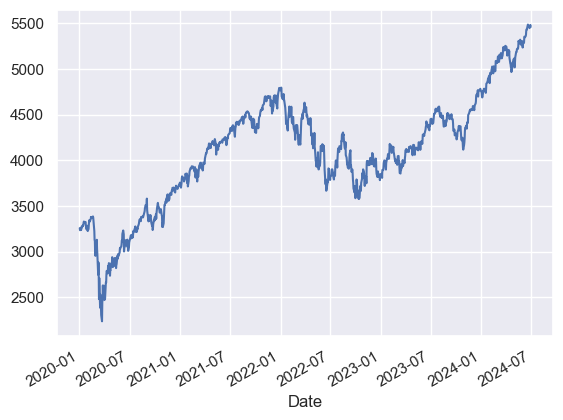

In [149]:
data.plot()

C:\Users\user\AppData\Local\Temp\ipykernel_5748\3253840221.py:2: FutureWarning: 'BA' is deprecated and will be removed in a future version, please use 'BYE' instead.
  data.resample('BA').mean().plot(style=':')
C:\Users\user\AppData\Local\Temp\ipykernel_5748\3253840221.py:3: FutureWarning: 'BA' is deprecated and will be removed in a future version, please use 'BYE' instead.
  data.asfreq('BA').plot(style='--');


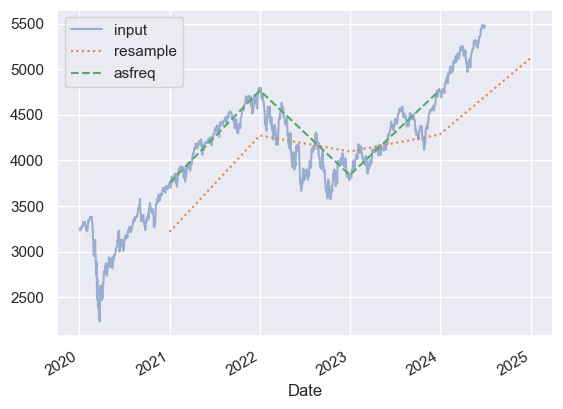

In [150]:
data.plot(alpha=0.5, style='-')
data.resample('BA').mean().plot(style=':')
data.asfreq('BA').plot(style='--');
plt.legend(['input','resample','asfreq'],
           loc='upper left');

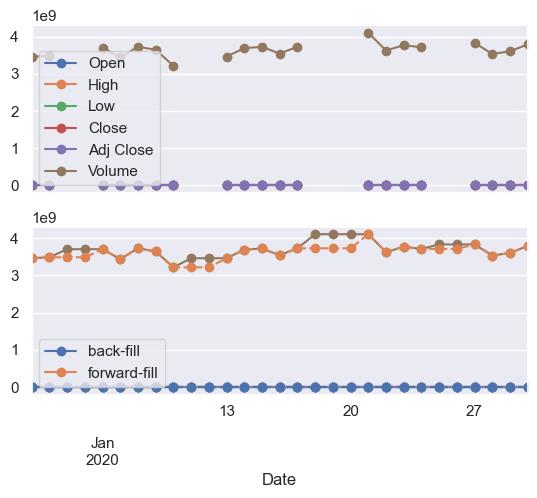

In [154]:
fig, ax = plt.subplots(2, sharex=True)

data=sp500.iloc[:20]

data.asfreq('D').plot(ax=ax[0], marker='o')

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill","forward-fill"]);

<Axes: xlabel='Date'>

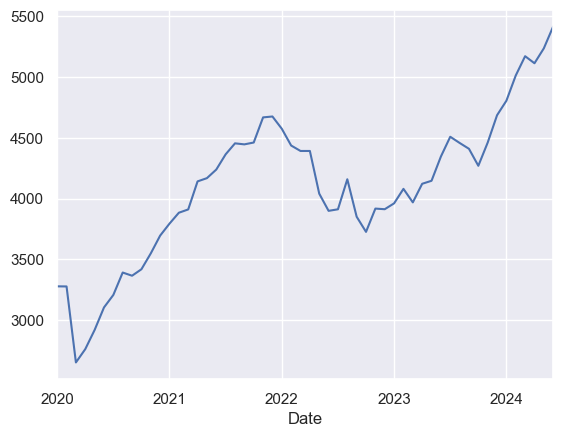

In [155]:
#ME-Month end
sp500['Close'].resample('ME').mean().plot()

In [156]:
#ffill 앞날걸로 missing value 채워~
#resample은 축을 줄인다. resample은 선택이 아니고 원하는 빈도로 다시 샘플링한다는 뜻임.
#여기서는 평균값으로 다시셋팅하는거지.
#sp500['Close'].resample('ME').mean(): S&P 500 지수의 'Close' 컬럼을 월말('ME')을 기준으로 리샘플링하고, 평균을 계산합니다.
sp500['Close'].resample('ME').mean().ffill()

Date
2020-01-31    3278.202858
2020-02-29    3277.314183
2020-03-31    2652.393632
2020-04-30    2761.975226
2020-05-31    2919.608484
2020-06-30    3104.660933
2020-07-31    3207.619096
2020-08-31    3391.710019
2020-09-30    3365.516671
2020-10-31    3418.699996
2020-11-30    3548.992480
2020-12-31    3695.310014
2021-01-31    3793.748432
2021-02-28    3883.432116
2021-03-31    3910.508280
2021-04-30    4141.176200
2021-05-31    4167.849536
2021-06-30    4238.489546
2021-07-31    4363.712798
2021-08-31    4453.965931
2021-09-30    4445.543318
2021-10-31    4460.707078
2021-11-30    4667.386649
2021-12-31    4674.772772
2022-01-31    4573.815454
2022-02-28    4435.980494
2022-03-31    4391.265264
2022-04-30    4391.295996
2022-05-31    4040.360003
2022-06-30    3898.946684
2022-07-31    3911.729492
2022-08-31    4158.563084
2022-09-30    3850.520496
2022-10-31    3726.050956
2022-11-30    3917.488595
2022-12-31    3912.380952
2023-01-31    3960.656531
2023-02-28    4079.684725
2023-03

In [157]:
#asfreq('ME')는 월말에 가장 가까운 데이터를 선택
#asfreq는 하나의 값을 맨 마지막 값으로 선택하고, 
## 'Close' 컬럼을 월말 기준으로 리샘플링하고, NaN을 앞 방향으로 채움
sp500['Close'].asfreq('ME').ffill()

Date
2020-01-31    3225.520020
2020-02-29    3225.520020
2020-03-31    2584.590088
2020-04-30    2912.429932
2020-05-31    2912.429932
2020-06-30    3100.290039
2020-07-31    3271.120117
2020-08-31    3500.310059
2020-09-30    3363.000000
2020-10-31    3363.000000
2020-11-30    3621.629883
2020-12-31    3756.070068
2021-01-31    3756.070068
2021-02-28    3756.070068
2021-03-31    3972.889893
2021-04-30    4181.169922
2021-05-31    4181.169922
2021-06-30    4297.500000
2021-07-31    4297.500000
2021-08-31    4522.680176
2021-09-30    4307.540039
2021-10-31    4307.540039
2021-11-30    4567.000000
2021-12-31    4766.180176
2022-01-31    4515.549805
2022-02-28    4373.939941
2022-03-31    4530.410156
2022-04-30    4530.410156
2022-05-31    4132.149902
2022-06-30    3785.379883
2022-07-31    3785.379883
2022-08-31    3955.000000
2022-09-30    3585.620117
2022-10-31    3871.979980
2022-11-30    4080.110107
2022-12-31    4080.110107
2023-01-31    4076.600098
2023-02-28    3970.149902
2023-03

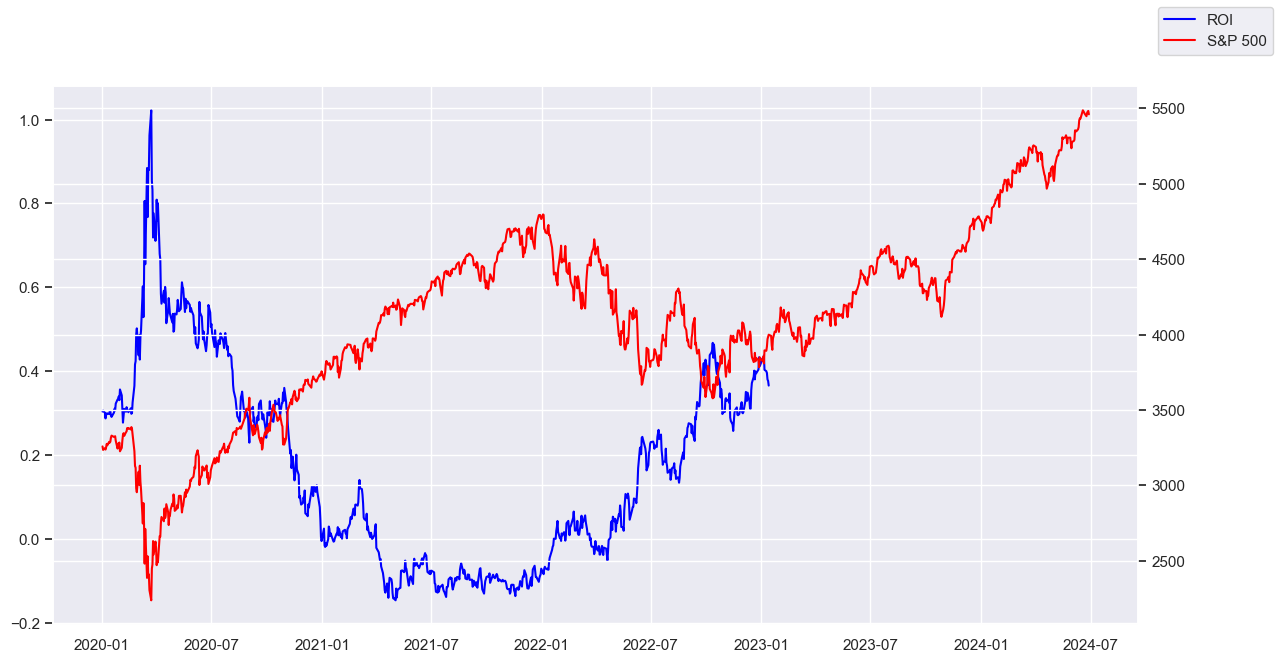

In [164]:
#.shift(-365)는 데이터를 365일 앞으로 이동시키는 것을 의미합니다.
##따라서 sp500['Close'].shift(-365)은 현재 날짜에서 365일 후의 S&P 500 지수의 종가를 가져오게 됩니다.
ROI = (sp500['Close'].shift(-365) - sp500['Close']) / sp500['Close']

fig, ax1 = plt.subplots(figsize=(14, 7))
ax1.plot(ROI.index, ROI, color='blue', label='ROI')
ax2 = ax1.twinx()
ax2.plot(sp500.index, sp500['Close'], color='red', label='S&P 500')
fig.legend()

In [166]:
sp500_c=sp500['Close']

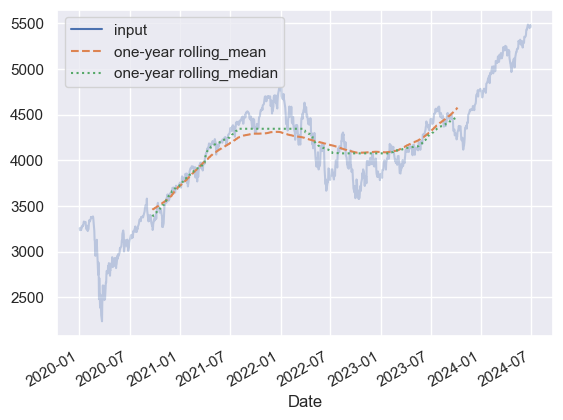

In [167]:
rolling=sp500_c.rolling(365, center=True)

data=pd.DataFrame({'input':sp500_c,
                   'one-year rolling_mean':rolling.mean(),
                   'one-year rolling_median': rolling.median()})
ax=data.plot(style=['-','--',':'])
ax.lines[0].set_alpha(0.3)

In [186]:
url=('https://raw.githubusercontent.com/DataScienceWorks/PredictingBicycleTraffic/master/data/FremontBridge.csv')
df = pd.read_csv('https://raw.githubusercontent.com/DataScienceWorks/PredictingBicycleTraffic/master/data/FremontBridge.csv', index_col='Date', parse_dates=True)

df.head()


C:\Users\user\AppData\Local\Temp\ipykernel_5748\3762125351.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('https://raw.githubusercontent.com/DataScienceWorks/PredictingBicycleTraffic/master/data/FremontBridge.csv', index_col='Date', parse_dates=True)


,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-03 00:00:00,9.0,4.0
2012-10-03 01:00:00,6.0,4.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,3.0,2.0
2012-10-03 04:00:00,1.0,6.0


In [187]:
df.columns=['East','West']

In [188]:
df.head()

,East,West
Date,,
2012-10-03 00:00:00,9.0,4.0
2012-10-03 01:00:00,6.0,4.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,3.0,2.0
2012-10-03 04:00:00,1.0,6.0


In [189]:
df['Total']=df['East']+df['West']

In [190]:
df.head()

,East,West,Total
Date,,,
2012-10-03 00:00:00,9.0,4.0,13.0
2012-10-03 01:00:00,6.0,4.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,3.0,2.0,5.0
2012-10-03 04:00:00,1.0,6.0,7.0


In [180]:
df.dropna().describe()

,East,West,Total
count,50319.000000,50319.000000,50319.000000
mean,56.934399,52.940678,109.875077
std,82.835585,68.728939,138.526584
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,15.000000
50%,28.000000,29.000000,60.000000
75%,69.000000,70.000000,143.000000
max,717.000000,698.000000,957.000000


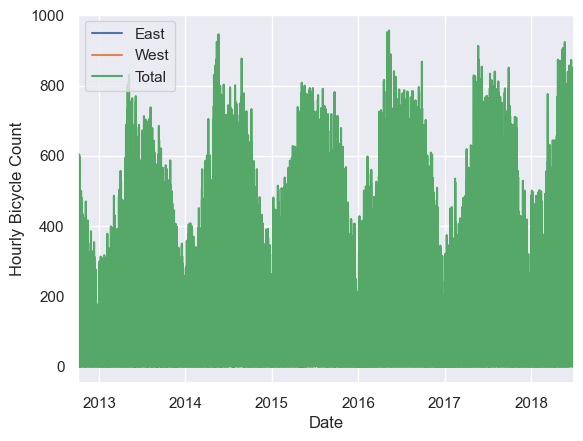

In [191]:
df.plot()
plt.ylabel('Hourly Bicycle Count');
plt.show()

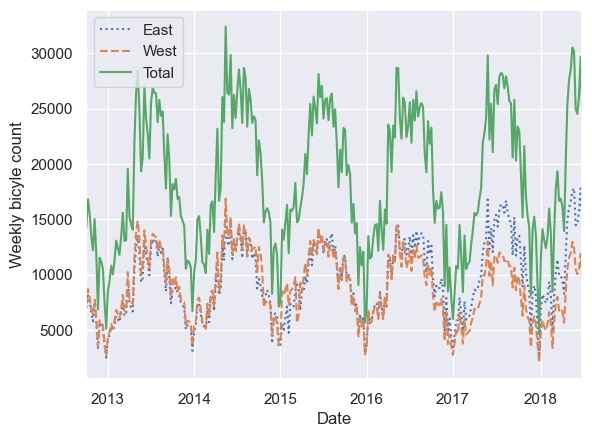

In [193]:
#주간합계로 리샘플링
weekly=df.resample('W').sum()
weekly.plot(style=[':','--','-'])
plt.ylabel('Weekly bicyle count');

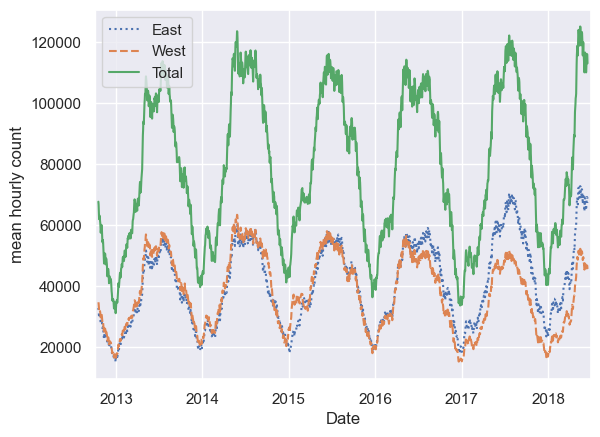

In [195]:
#새로운 데이터프레임은 원본데이터프레임df를 d=일별로 리샘플링하여 합계를 생성함
#30일 이동 평균을 계산하는.center=true는 롤링윈도우 중앙정렬, 그리고 30일동안의 다시 합계 sum()
daily = df.resample('D').sum()
#rolling(30)은 30일간의 이동평균선을 나타내겠다그말임
daily.rolling(30, center=True).sum().plot(style=[':','--','-'])
plt.ylabel('mean hourly count');

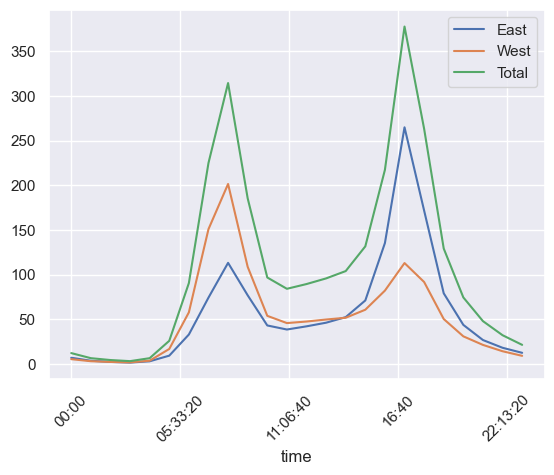

In [200]:
# 시간별 평균 계산 및 시각화
df.groupby(df.index.time).mean().plot()

# xticks 설정
plt.xticks(rotation=45)  # x축 눈금을 45도로 회전하여 표시

plt.show()